<div style="border-radius:18px; padding: 15px; background-color: rgb(158, 111, 131); font-size:80%; text-align:right; width: 95%;">

<h2 align="CENTER"><font color=WHITE>Analyzing Consumer Behaviour Using Machine Learning to Enhance Customer Cross-Selling Recommendation</font></h2>

<h2 align="CENTER"><font color=WHITE>by: VALENTINE</font></h2>

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **Problem Statement**

Retail businesses face significant challenges in optimizing cross-selling strategies, which impacts their overall profitability and operational efficiency. The key issues include:

✅ **Inefficient Product Recommendations:**

- Current systems fail to provide personalized and effective product suggestions, leading to missed sales opportunities.

✅ **Overstocking of Slow-Moving Inventory:**

- Poor recommendations result in the accumulation of unsold inventory, increasing storage costs and reducing profitability.

✅ **Outdated Recommendation Approaches:**

- Traditional methods rely on static rules or subjective intuition, which are ineffective in dynamic retail environments.

***
- This project aims to develop a machine learning-driven recommendation system that personalizes product suggestions based on customer purchase history, demographics, and shopping behavior. By integrating predictive analytics, this system will improve customer experience, boost sales, and optimize inventory management at Zapatos Cave.





<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **Problem Objectives**

1.	Develop a machine learning model to predict customer purchase patterns and improve cross-selling recommendations.
2.	Segment customers based on purchase history and demographics to provide personalized product suggestions.
3.	Optimize inventory management by identifying slow-moving products and incorporating them into recommendations.
4.	Evaluate model performance and business impact metrics such as increased revenue and reduced stock wastage.


<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **Data Description**

| Column Name          | Description                                      |
|----------------------|--------------------------------------------------|
| Gender               | Gender of the customer.                          |
| Customer_Name        | Name of the customer.                            |
| Category             | Product category.                                |
| Product_Description  | Description of the product.                      |
| Date                 | Date of purchase.                                |
| Colour               | Product color.                                   |
| Size                 | Product size.                                    |
| Quantity_Sold        | Number of items sold.                            |
| Sub_Total            | Subtotal of the purchase.                        |
| Shipping_Fee         | Shipping fee charged.                            |
| Total_Amount         | Total amount paid.                               |
| Bill_To_City         | City where the order was billed.                 |
| Type_Of_Sale         | Sale type (e.g., online, walk-in).               |

<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 1 | SETUP AND INITIALIZATION</p>

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.metrics import ndcg_score
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import precision_score, recall_score, ndcg_score
from sklearn.model_selection import train_test_split


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 2 | LOADING DATASET</p>

In [2]:
# loading the data set

data = pd.read_csv('ZapatosCaveData.csv')

# Viewing the first five columns

data.head()

,Gender,Customer_ID,Category,Product_Description,Date,Colour,Size,Quantity_Sold,Sub_Total,Shipping_Fee,Total_Amount,Bill_To_City,Type_Of_Sale
0,Female,976a0e6392349853387a588194207f3d,Bottoms,90 Degree Long Pants #09,09-05-23,Black,3XL,1,1600,320,1920,Nairobi,Online
1,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,16-08-22,Black,3XL,1,3000,280,3280,Nairobi,Online
2,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,16-08-22,Light Blue,3XL,1,3000,280,3280,Nairobi,Online
3,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,16-08-22,Dark Blue,3XL,1,3000,280,3280,Nairobi,Online
4,Male,ac39b72e72d4ca3fc634d9c5d6c4ea20,Hoodies,Nike Jacket 2 Layer #07,19-08-21,Camo L/Gray,XL,1,2000,0,2000,Nakuru,Walk In


In [3]:
# display the number of rows and columns
rows, columns = data.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 5910 rows and 13 columns.


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 3 | INITIAL EXPLORATION</p>

In [4]:
# display the general information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               5910 non-null   object
 1   Customer_ID          5910 non-null   object
 2   Category             5910 non-null   object
 3   Product_Description  5910 non-null   object
 4   Date                 5910 non-null   object
 5   Colour               5910 non-null   object
 6   Size                 5910 non-null   object
 7   Quantity_Sold        5910 non-null   int64 
 8   Sub_Total            5910 non-null   int64 
 9   Shipping_Fee         5910 non-null   int64 
 10  Total_Amount         5910 non-null   int64 
 11  Bill_To_City         5910 non-null   object
 12  Type_Of_Sale         5910 non-null   object
dtypes: int64(4), object(9)
memory usage: 600.4+ KB


<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **OBSERVATION**

#### **Missing Values**  
- **No Missing Values**:  
  - Every column in the dataset has **5,910 non-null entries**, indicating there are no missing values.


#### **Data Types**  
The dataset consists of the following data types:

- **Categorical Columns** (object type - 9 columns):  
  - Gender  
  - Customer_ID  
  - Category  
  - Product_Description  
  - Date  
  - Colour  
  - Size  
  - Bill_To_City  
  - Type_Of_Sale  

- **Numerical Columns** (int64 type - 4 columns):  
  - Quantity_Sold  
  - Sub_Total  
  - Shipping_Fee  
  - Total_Amount  

- **Date Column**:  
  - The Date column is currently stored as object type instead of datetime.



#### **Actions Required**  
- **Scaling for Numerical Columns**:  
  - Apply scaling techniques such as **StandardScaler** or **MinMaxScaler** to normalize the numerical columns.  

- **Convert Date Column to datetime**:  
  - Convert the Date column from object type to datetime for better handling and analysis of time-based data.

<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 4 | DATA CLEANING</p>

In [5]:
# Check for duplicates in the entire dataset
num_duplicates = data.duplicated().sum()

# Display the number of duplicates
print(f"Number of duplicates in the dataset: {num_duplicates}")


Number of duplicates in the dataset: 82


In [6]:
# Drop duplicates from the dataset
data_cleaned = data.drop_duplicates()

# Display the shape of the dataset before and after dropping duplicates
print(f"Shape of the dataset before dropping duplicates: {data.shape}")
print(f"Shape of the dataset after dropping duplicates: {data_cleaned.shape}")


Shape of the dataset before dropping duplicates: (5910, 13)
Shape of the dataset after dropping duplicates: (5828, 13)


In [7]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%y')

# Verify the conversion

print(data['Date'].dtype)  
print("\nSample of the converted 'Date' column:")
print(data['Date'].head())

datetime64[ns]

Sample of the converted 'Date' column:
0   2023-05-09
1   2022-08-16
2   2022-08-16
3   2022-08-16
4   2021-08-19
Name: Date, dtype: datetime64[ns]


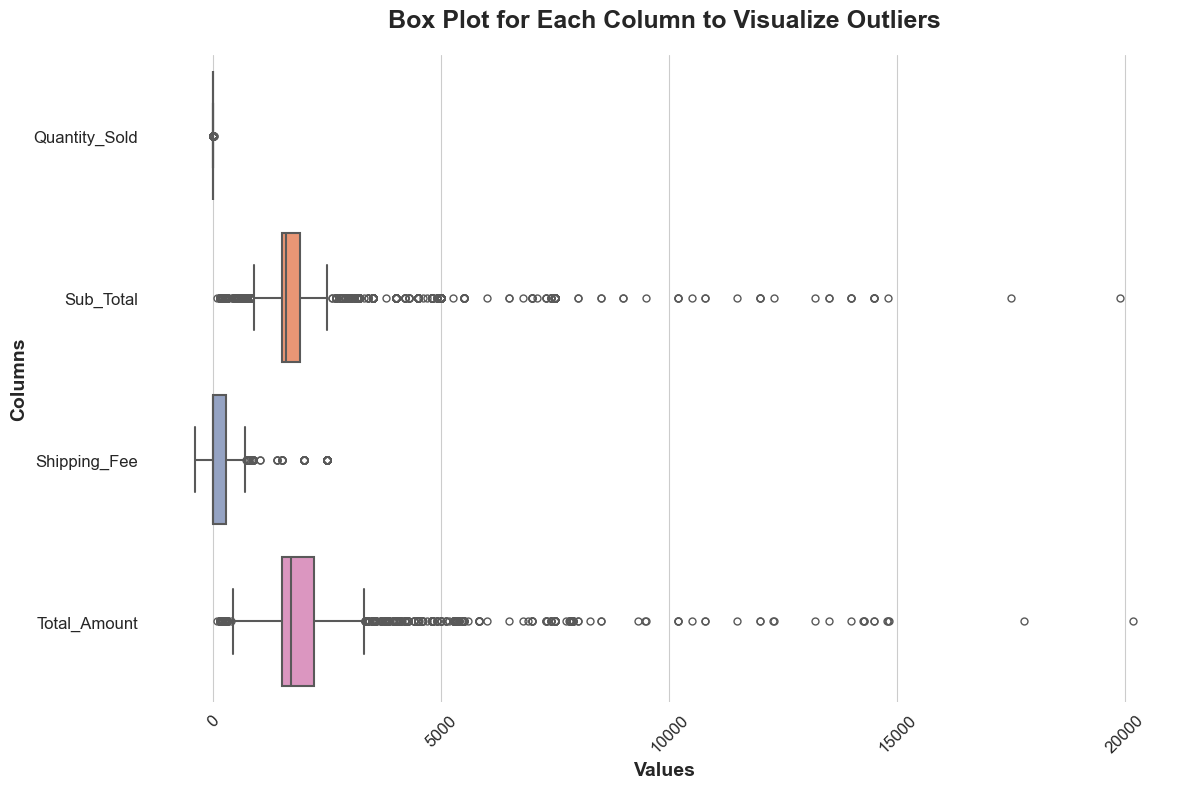

In [8]:
plt.figure(figsize=(12, 8))  # Increase figure size
sns.set_style("whitegrid")  
sns.set_palette("pastel")  

# Create the boxplot
sns.boxplot(data=data, orient="h", palette="Set2", width=0.8, fliersize=5, linewidth=1.5)

# Add title and labels with improved font styling
plt.title('Box Plot for Each Column to Visualize Outliers', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Values', fontsize=14, fontweight='bold')
plt.ylabel('Columns', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
# Function to remove outliers using a wider IQR range
def remove_outliers_iqr(data, column, multiplier=3):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - multiplier * IQR  # Wider lower bound
    upper_bound = Q3 + multiplier * IQR  # Wider upper bound
    # Filter out rows with extreme outliers
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data_cleaned

# Select numerical columns for outlier removal
numerical_columns = ['Quantity_Sold', 'Sub_Total', 'Shipping_Fee', 'Total_Amount']

# Remove outliers from each numerical column with a wider range
data_cleaned = data.copy()  # Create a copy of the original dataset
for col in numerical_columns:
    data_cleaned = remove_outliers_iqr(data_cleaned, col, multiplier=3)  # Use multiplier=3

# Display the shape of the dataset before and after removing outliers
print(f"Shape of the dataset before removing outliers: {data.shape}")
print(f"Shape of the dataset after removing outliers: {data_cleaned.shape}")



Shape of the dataset before removing outliers: (5910, 13)
Shape of the dataset after removing outliers: (4767, 13)


In [10]:
data =  data_cleaned.copy()

In [11]:
# Extract year and month name from the 'Date' column
data['Year'] = data['Date'].dt.year  # Extract year
data['Month_Name'] = data['Date'].dt.strftime('%B')  # Extract full month name

data.head()

,Gender,Customer_ID,Category,Product_Description,Date,Colour,Size,Quantity_Sold,Sub_Total,Shipping_Fee,Total_Amount,Bill_To_City,Type_Of_Sale,Year,Month_Name
0,Female,976a0e6392349853387a588194207f3d,Bottoms,90 Degree Long Pants #09,2023-05-09,Black,3XL,1,1600,320,1920,Nairobi,Online,2023,May
1,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Black,3XL,1,3000,280,3280,Nairobi,Online,2022,August
2,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Light Blue,3XL,1,3000,280,3280,Nairobi,Online,2022,August
3,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Dark Blue,3XL,1,3000,280,3280,Nairobi,Online,2022,August
4,Male,ac39b72e72d4ca3fc634d9c5d6c4ea20,Hoodies,Nike Jacket 2 Layer #07,2021-08-19,Camo L/Gray,XL,1,2000,0,2000,Nakuru,Walk In,2021,August


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 5 | EXPLORATORY DATA ANALYSIS</p>

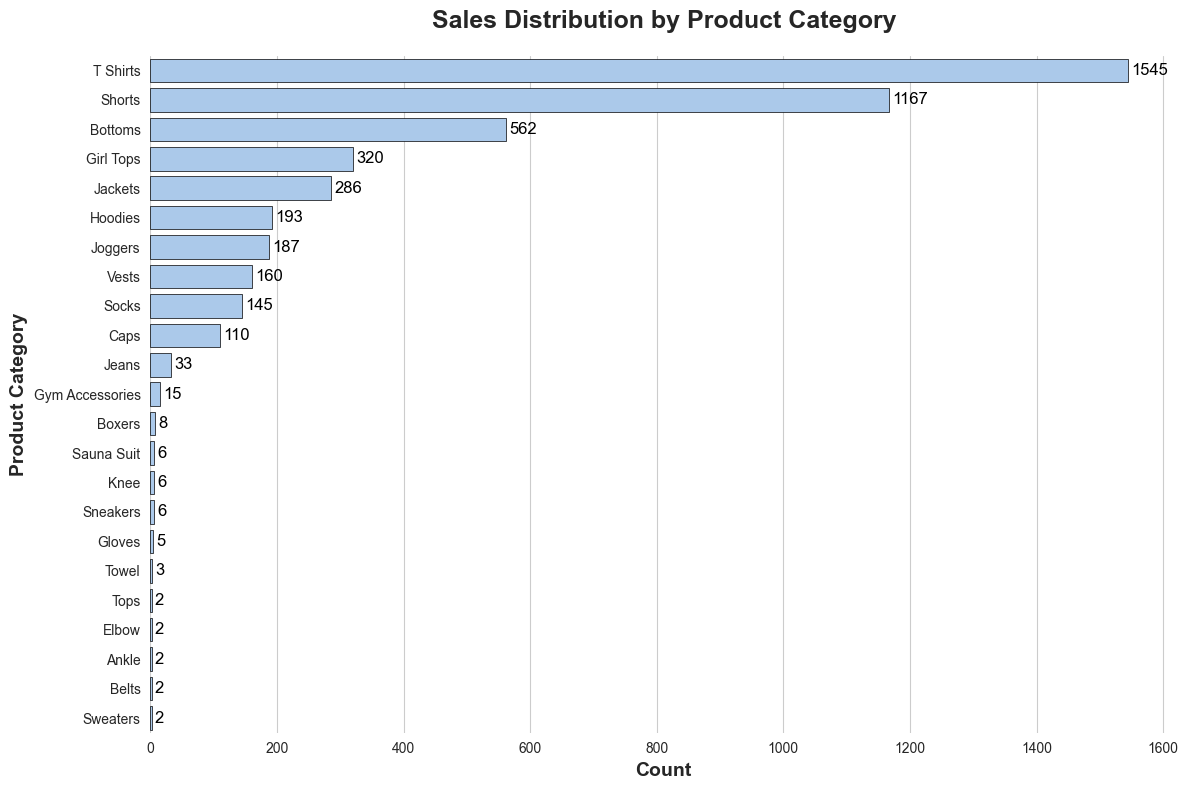

In [12]:
# Distribution of Sales by Product Category
plt.figure(figsize=(12, 8))  
sns.set_style("whitegrid")  
sns.set_palette("pastel")  

# Create the countplot
ax = sns.countplot(data=data, y='Category', order=data['Category'].value_counts().index, 
                   edgecolor='black', linewidth=0.5)  

# Add title and labels with improved font styling
plt.title('Sales Distribution by Product Category', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Product Category', fontsize=14, fontweight='bold')

# Add data labels on the bars
for p in ax.patches:
    width = p.get_width()  
    plt.text(width + 5,  
             p.get_y() + p.get_height() / 2,  
             f'{int(width)}',  # Text: count value
             va='center', ha='left', fontsize=12, color='black')  

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **OBSERVATION**

1. **Top-Selling Categories**:
   - **T Shirts** dominate sales with **1,545 units sold**, making them the most popular product category.
   - **Shorts** and **Bottoms** follow with significant sales, indicating strong demand for casual and lower-body apparel.

2. **Mid-Range Performers**:
   - Categories like **Girl Tops**, **Jackets**, **Hoodies**, and **Joggers** show moderate sales, suggesting steady demand for these items.

3. **Low-Selling Categories**:
   - **Gym Accessories**, **Boxers**, **Sneakers**, and **Sauna Suits** have very low sales (less than 20 units each), indicating niche or limited demand.

4. **Potential Insights**:
   - Focus on promoting **high-performing categories** (e.g., T Shirts, Shorts) to maximize revenue.
   - Investigate reasons for low sales in **underperforming categories** (e.g., Gym Accessories, Boxers) and consider strategies like discounts, bundling, or marketing campaigns to boost sales.

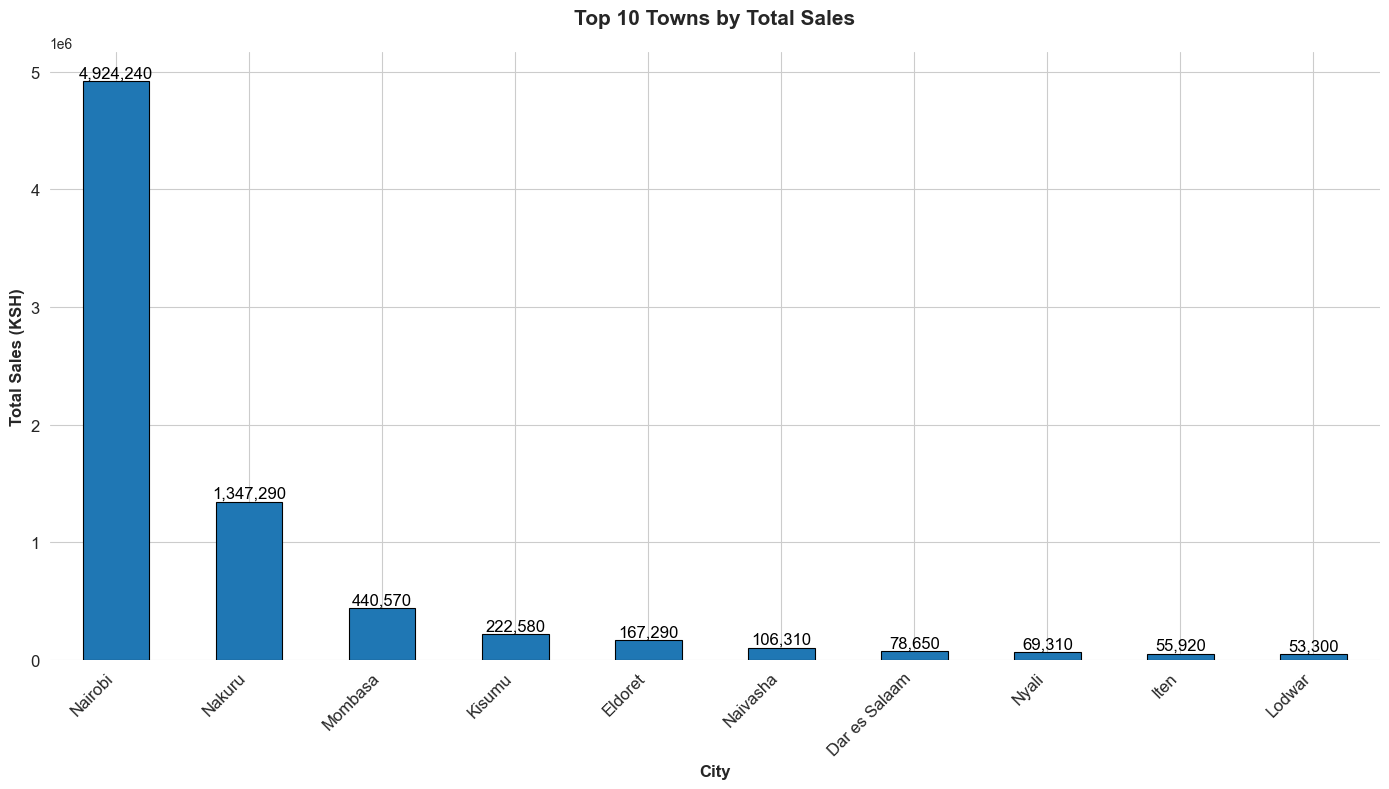

In [13]:
# Define the number of top towns to display
top_n = 10

# Calculate total sales by city and select the top N cities
city_sales = (data.groupby('Bill_To_City')['Total_Amount']
              .sum()
              .sort_values(ascending=False)
              .head(top_n))


# Plot with improved styling
plt.figure(figsize=(14, 8))  # Increase figure size
sns.set_style("whitegrid")  
sns.set_palette("tab10")  

# Create the bar plot
city_sales.plot(kind='bar', edgecolor='black', linewidth=0.8)

# Add title and labels with improved font styling
plt.title(f'Top {top_n} Towns by Total Sales', fontsize=15, fontweight='bold', pad=20)
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales (KSH)', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.yticks(fontsize=12)

# Add data labels on the bars
for i, value in enumerate(city_sales):
    plt.text(i, value + 5000, f'{value:,.0f}',  
             ha='center', va='bottom', fontsize=12, color='black')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **OBSERVATION**

1. **Top-Performing City**:
   - **Nairobi** dominates with the highest total sales of **KSH 4,924,240**, making it the primary revenue generator by a significant margin.

2. **Secondary Cities**:
   - **Nakuru** and **Mombasa** follow with **KSH 1,347,290** and **KSH 440,570** respectively, indicating moderate but important contributions to overall sales.

3. **Lower-Performing Cities**:
   - Cities like **Dar es Salaam**, **Nyali**, **Iten**, and **Lodwar** have significantly lower sales (ranging from **KSH 53,300** to **KSH 78,650**), suggesting limited market activity or lower demand in these areas.

4. **Potential Insights**:
   - Focus on **Nairobi** to maintain its strong market position and explore opportunities for further growth.
   - Invest in marketing and sales strategies for **secondary cities** (e.g., Nakuru, Mombasa) to boost their contributions.
   - Investigate the reasons behind low sales in **lower-performing cities** and consider targeted campaigns or improved distribution channels to enhance performance.

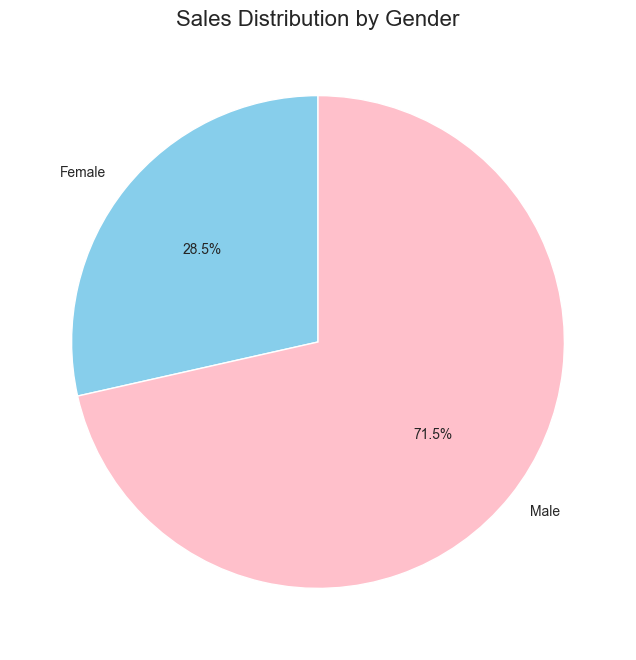

In [14]:
# Gender-Based Purchasing Behavior
gender_sales = data.groupby('Gender')['Total_Amount'].sum()

# Plot gender-based sales
plt.figure(figsize=(12, 8))
gender_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Sales Distribution by Gender', fontsize=16)
plt.ylabel('')
plt.show()

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **OBSERVATION**

1. **Dominant Gender**:
   - **Male** customers account for **71.5%** of total sales, indicating they are the primary drivers of revenue.

2. **Female Contribution**:
   - **Female** customers contribute **28.5%** of total sales, significantly less compared to males.

3. **Potential Insights**:
   - The data suggests a strong preference or purchasing power among male customers. Marketing strategies and product offerings could be tailored to further engage this demographic.
   - Investigate the reasons behind the lower sales contribution from female customers. Consider targeted campaigns or product lines to increase their engagement and spending.

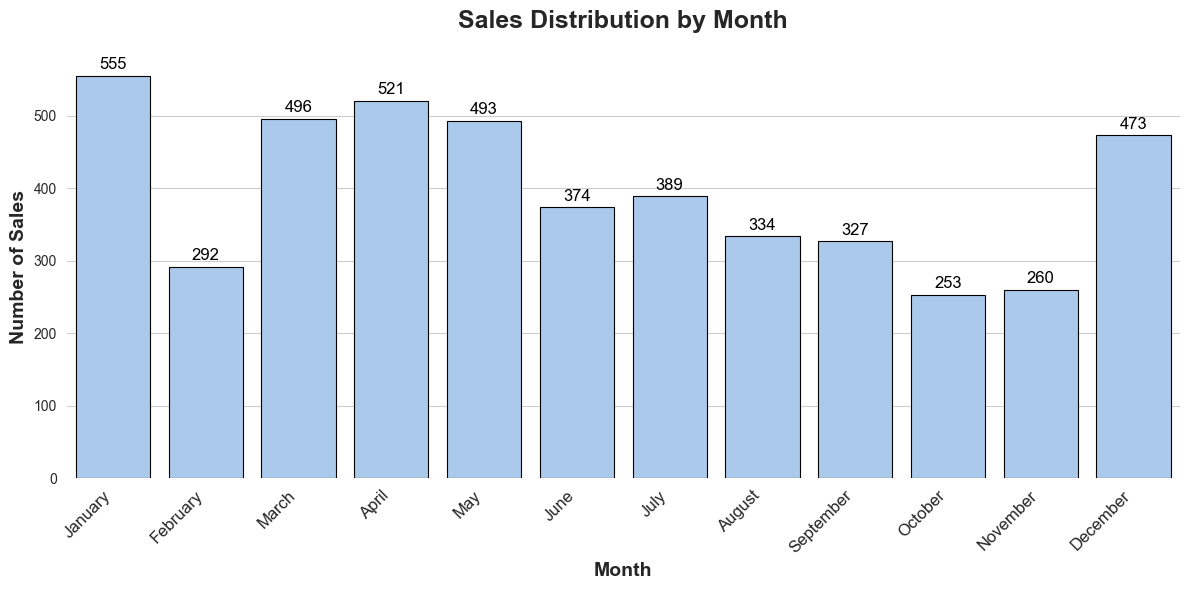

In [15]:

# Count the occurrences of each month
month_counts = data['Month_Name'].value_counts()

# Define the correct order of months for proper sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the month_counts to follow the correct order
month_counts = month_counts.reindex(month_order)

# Plot with improved styling
plt.figure(figsize=(12, 6))  
sns.set_palette("pastel")  

# Create the bar plot
sns.barplot(x=month_counts.index, y=month_counts.values, edgecolor='black', linewidth=0.8)

# Add title and labels with improved font styling
plt.title('Sales Distribution by Month', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Number of Sales', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12, ha='right')

# Add data labels on the bars
for i, value in enumerate(month_counts.values):
    plt.text(i, value + 5, f'{value}',  
             ha='center', va='bottom', fontsize=12, color='black')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **OBSERVATION**

1. **Highest Sales Month**: 
   - January recorded the highest number of sales with **555** units.
   
2. **Lowest Sales Month**: 
   - October had the lowest number of sales, with only **253** units.

3. **Peak and Dip in Sales**: 
   - Sales were relatively high at the beginning of the year (January: 555, March: 496, April: 521).
   - There was a decline from June to November, with the lowest point in October.

4. **Sales Recovery in December**: 
   - After the decline in sales from June to November, December saw a recovery with **473** sales.

5. **Sales Trend**: 
   - The first half of the year (January–May) had higher sales compared to the second half (June–November).
   - The second half had a significant dip, with the lowest sales in October and November.

6. **Possible Insights**:
   - Sales may be influenced by seasonal trends, with a drop during mid-year and a recovery in December.
   - October and November might require marketing strategies to boost sales.
   - The beginning of the year and the holiday season (December) show strong sales potential.


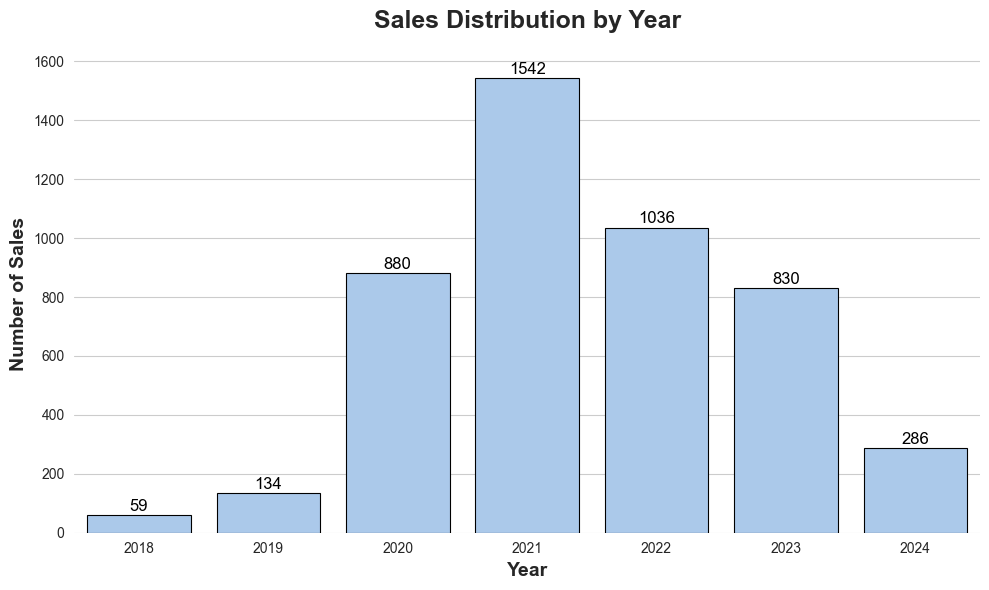

In [16]:

# Count the occurrences of each year
year_counts = data['Year'].value_counts().sort_index()

# Plot with improved styling
plt.figure(figsize=(10, 6))  # Set figure size
sns.set_style("whitegrid")  
sns.set_palette("pastel") 

# Create the bar plot
sns.barplot(x=year_counts.index, y=year_counts.values, edgecolor='black', linewidth=0.8)

# Add title and labels with improved font styling
plt.title('Sales Distribution by Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Sales', fontsize=14, fontweight='bold')

# Add data labels on the bars
for i, value in enumerate(year_counts.values):
    plt.text(i, value + 5, f'{value}',  
             ha='center', va='bottom', fontsize=12, color='black')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

📌 **OBSERVATION**

1. **Highest Sales Year**:  
   - The year **2021** recorded the highest number of sales with **1542** units.

2. **Lowest Sales Year**:  
   - The year **2018** had the lowest sales, with only **59** units.

3. **Growth Trend (2018-2021)**:  
   - There was a steady increase in sales from **2018 (59)** to **2019 (134)**.
   - A significant jump occurred in **2020 (880)**, followed by a peak in **2021 (1542)**.

4. **Decline in Sales (2022-2024)**:  
   - Sales dropped after 2021, decreasing to **1036** in **2022**, then further to **830** in **2023**.
   - Sales in **2024** so far are **286**, indicating a further decline.

5. **Possible Insights**:  
   - **2020 and 2021 saw exceptional sales growth**, possibly due to external factors such as increased demand.  
   - **Post-2021, there is a declining trend**, which might indicate market saturation, reduced demand, or external economic conditions.  


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 6.1| Customer Segmentation for Personalized Product Suggestions</p>

In [17]:
# Feature 1: Total Spending per Customer
total_spending = data.groupby('Customer_ID')['Total_Amount'].sum().reset_index()
total_spending.rename(columns={'Total_Amount': 'Total_Spending'}, inplace=True)

In [18]:
# Feature 2: Purchase Frequency per Customer
purchase_frequency = data.groupby('Customer_ID')['Date'].count().reset_index()
purchase_frequency.rename(columns={'Date': 'Purchase_Frequency'}, inplace=True)

In [19]:
# Feature 3: Recency (Days since last purchase)
latest_date = data['Date'].max()
recency = data.groupby('Customer_ID')['Date'].max().reset_index()
recency['Recency'] = (latest_date - recency['Date']).dt.days
recency.drop(columns=['Date'], inplace=True)

In [20]:
# Feature 4: Customer Lifetime Value (CLV) (approx. total spend * purchase frequency)
clv = total_spending.merge(purchase_frequency, on='Customer_ID')
clv['CLV'] = clv['Total_Spending'] * clv['Purchase_Frequency']

In [21]:
# Combine all features into a single dataframe
customer_features = total_spending.merge(purchase_frequency, on='Customer_ID')
customer_features = customer_features.merge(recency, on='Customer_ID')
customer_features = customer_features.merge(clv[['Customer_ID', 'CLV']], on='Customer_ID')

In [22]:
# Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['Customer_ID']))

In [23]:
# Finding optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

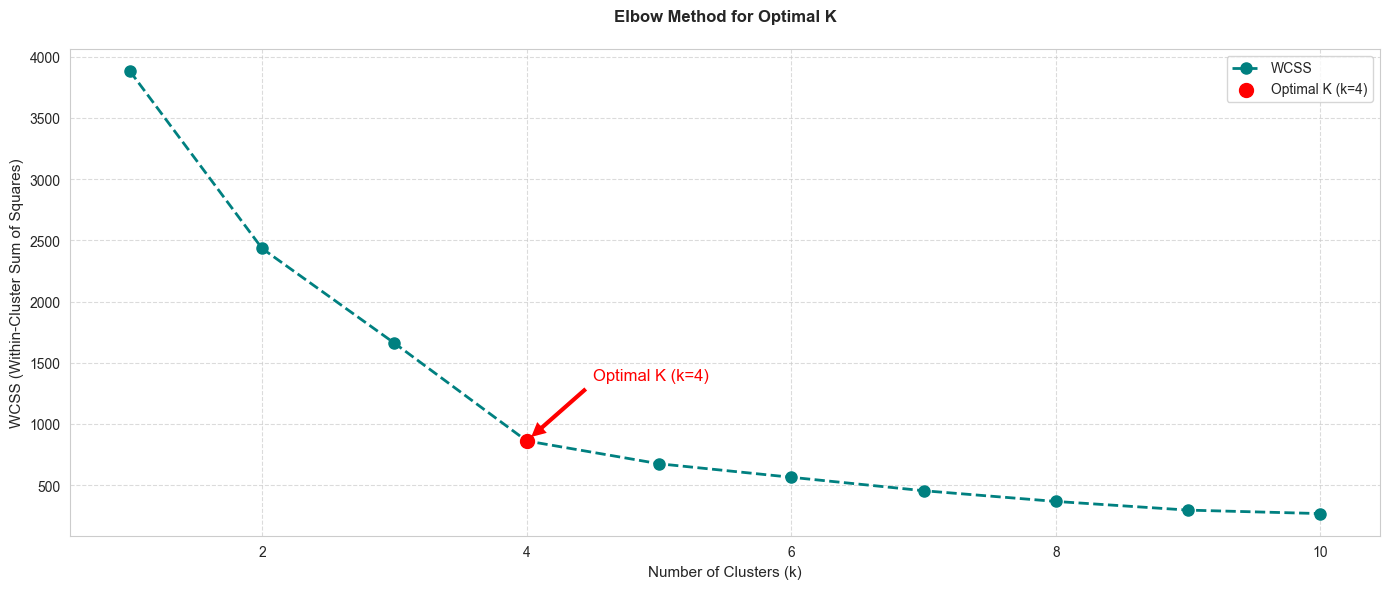

In [24]:
# Set Seaborn style and palette
sns.set_style("whitegrid") 
sns.set_palette("pastel")  

# Plot Elbow Method
plt.figure(figsize=(14, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', linewidth=2, markersize=8, color='teal', label='WCSS')

# Highlight the "elbow" point
elbow_k = 4  
plt.scatter(elbow_k, wcss[elbow_k - 1], color='red', s=100, zorder=5, label=f'Optimal K (k={elbow_k})')
plt.annotate(
    f'Optimal K (k={elbow_k})', 
    xy=(elbow_k, wcss[elbow_k - 1]), 
    xytext=(elbow_k + 0.5, wcss[elbow_k - 1] + 500), 
    fontsize=12, 
    color='red', 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Add labels and title
plt.xlabel('Number of Clusters (k)', fontsize=11)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=11)
plt.title('Elbow Method for Optimal K', fontsize=12, fontweight='bold', pad=20)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10, loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

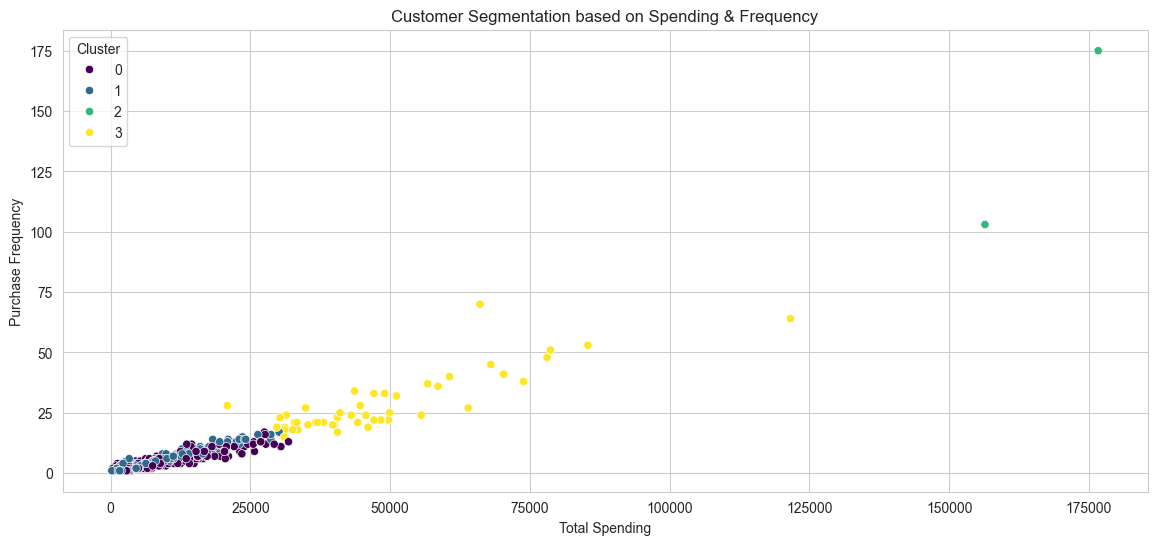

In [25]:
# Apply K-Means Clustering with optimal clusters
optimal_clusters = 4  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)


# Visualizing clusters using scatter plots
plt.figure(figsize=(14,6))
sns.scatterplot(x=customer_features['Total_Spending'], 
                y=customer_features['Purchase_Frequency'], 
                hue=customer_features['Cluster'], 
                palette='viridis')
plt.xlabel('Total Spending')
plt.ylabel('Purchase Frequency')
plt.title('Customer Segmentation based on Spending & Frequency')
plt.show()

In [48]:
# Step 1: Format cluster names with "Cluster X"
customer_features['Cluster'] = customer_features['Cluster'].apply(lambda x: f"Cluster {x}")

# Step 2: Merge cluster info into the copied data
customer_clusters = customer_features[['Customer_ID', 'Cluster']]
data_with_clusters = data_copy.merge(customer_clusters, on='Customer_ID', how='left')

# Step 3: Save to CSV
data_with_clusters.to_csv('customer_data_with_clusters.csv', index=False)

print("✅ Done! Cluster labels now look like 'Cluster 0', 'Cluster 1', etc.")


✅ Done! Cluster labels now look like 'Cluster 0', 'Cluster 1', etc.


In [49]:
data_with_clusters.head()

,Gender,Customer_ID,Category,Product_Description,Date,Colour,Size,Quantity_Sold,Sub_Total,Shipping_Fee,Total_Amount,Bill_To_City,Type_Of_Sale,Year,Month_Name,Cluster
0,Female,976a0e6392349853387a588194207f3d,Bottoms,90 Degree Long Pants #09,2023-05-09,Black,3XL,1,1600,320,1920,Nairobi,Online,2023,May,Cluster 0
1,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Black,3XL,1,3000,280,3280,Nairobi,Online,2022,August,Cluster 0
2,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Light Blue,3XL,1,3000,280,3280,Nairobi,Online,2022,August,Cluster 0
3,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Dark Blue,3XL,1,3000,280,3280,Nairobi,Online,2022,August,Cluster 0
4,Male,ac39b72e72d4ca3fc634d9c5d6c4ea20,Hoodies,Nike Jacket 2 Layer #07,2021-08-19,Camo L/Gray,XL,1,2000,0,2000,Nakuru,Walk In,2021,August,Cluster 1


In [26]:
# Apply Agglomerative Clustering with 4 clusters

agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
customer_features['Agg_Cluster'] = agg_clustering.fit_predict(scaled_features)


In [27]:

# Apply DBSCAN - Tuning eps and min_samples is crucial
dbscan = DBSCAN(eps=1.5, min_samples=5, metric='euclidean')
customer_features['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Count the number of noise points (-1 represents noise)
noise_count = (customer_features['DBSCAN_Cluster'] == -1).sum()
print(f"Number of Noise Points: {noise_count}")


Number of Noise Points: 8


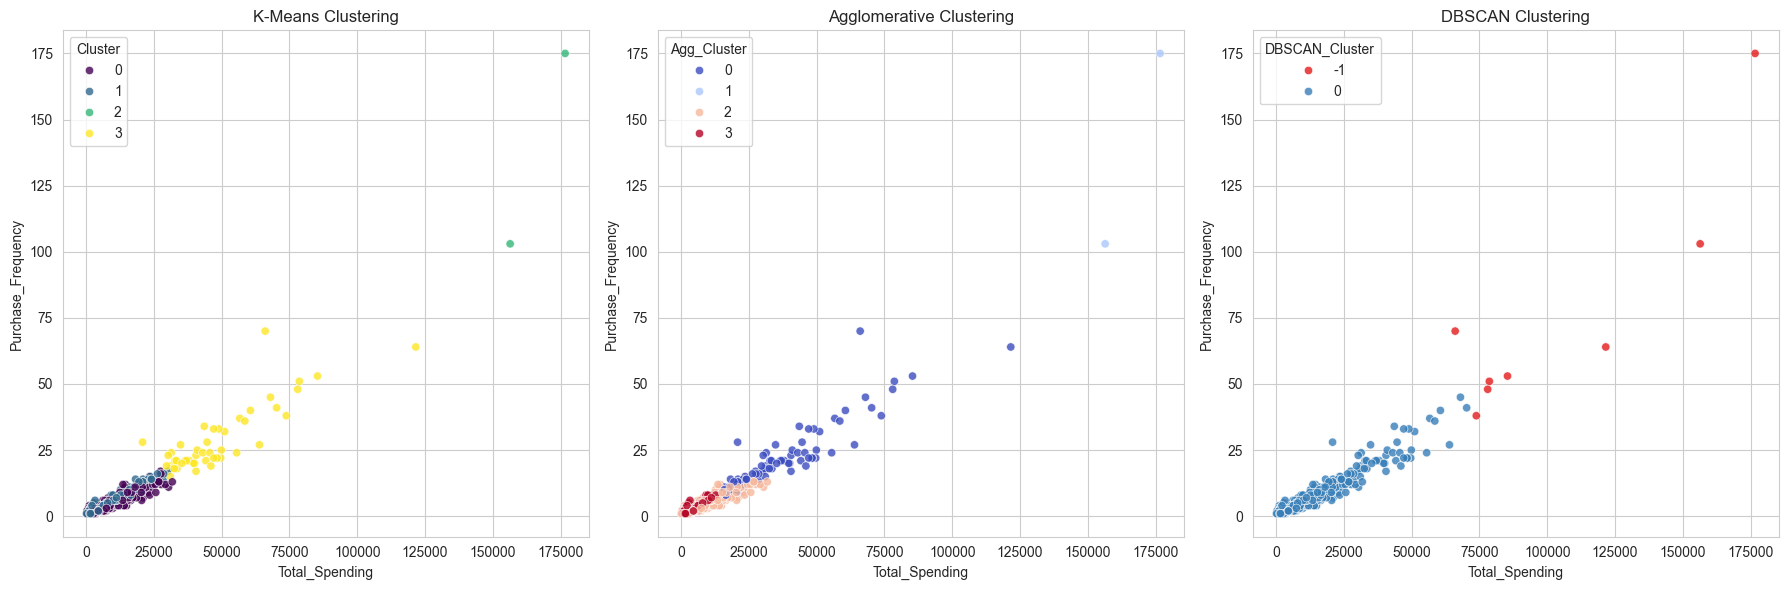

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# K-Means
sns.scatterplot(ax=axes[0], x=customer_features['Total_Spending'], y=customer_features['Purchase_Frequency'], 
                hue=customer_features['Cluster'], palette='viridis', alpha=0.8)
axes[0].set_title("K-Means Clustering")

# Agglomerative Clustering
sns.scatterplot(ax=axes[1], x=customer_features['Total_Spending'], y=customer_features['Purchase_Frequency'], 
                hue=customer_features['Agg_Cluster'], palette='coolwarm', alpha=0.8)
axes[1].set_title("Agglomerative Clustering")

# DBSCAN
sns.scatterplot(ax=axes[2], x=customer_features['Total_Spending'], y=customer_features['Purchase_Frequency'], 
                hue=customer_features['DBSCAN_Cluster'], palette='Set1', alpha=0.8)
axes[2].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()


<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">
            
**Observations from Clustering Results**  

**1. K-Means Clustering (Left Plot)**
- The algorithm has divided customers into **four clusters (0, 1, 2, 3)**.
- **Cluster 0 & 1:** Represent **low spenders with low purchase frequency**, mostly concentrated in the lower range of spending.
- **Cluster 3:** Contains **high-frequency shoppers** who spend more.
- **Cluster 2:** Represents **high-value customers** with the highest spending and purchase frequency.
- K-Means has effectively identified **distinct groups** but assumes spherical clusters.

**2. Agglomerative Clustering (Middle Plot)**
- Also clusters customers into **four groups** but with some differences from K-Means.
- **Clusters 0 and 1** again capture lower spenders.
- **Cluster 2** covers moderate spenders with slightly more frequent purchases.
- **Cluster 3** represents the **lowest spenders with minimal purchases**.
- **Overall**, Agglomerative clustering produced **a more gradual separation** of customer segments than K-Means.

**3. DBSCAN Clustering (Right Plot)**
- DBSCAN (Density-Based Spatial Clustering) is **mostly assigning customers to a single cluster (0)**.
- The red points (**Cluster -1**) are **outliers**—high spenders and frequent buyers who were **not assigned to any cluster**.
- DBSCAN struggles with **densely packed low-spending customers**, treating them as a single group.
- Best suited for **detecting anomalies**, like extremely high-value customers.

**Key Takeaways**
- **K-Means & Agglomerative clustering** produced structured groups, useful for customer segmentation.
- **DBSCAN identified anomalies** but wasn't effective at distinguishing customer groups.
- K-Means might be better if customer spending follows clear group patterns, while DBSCAN is useful if identifying outliers is a priority.


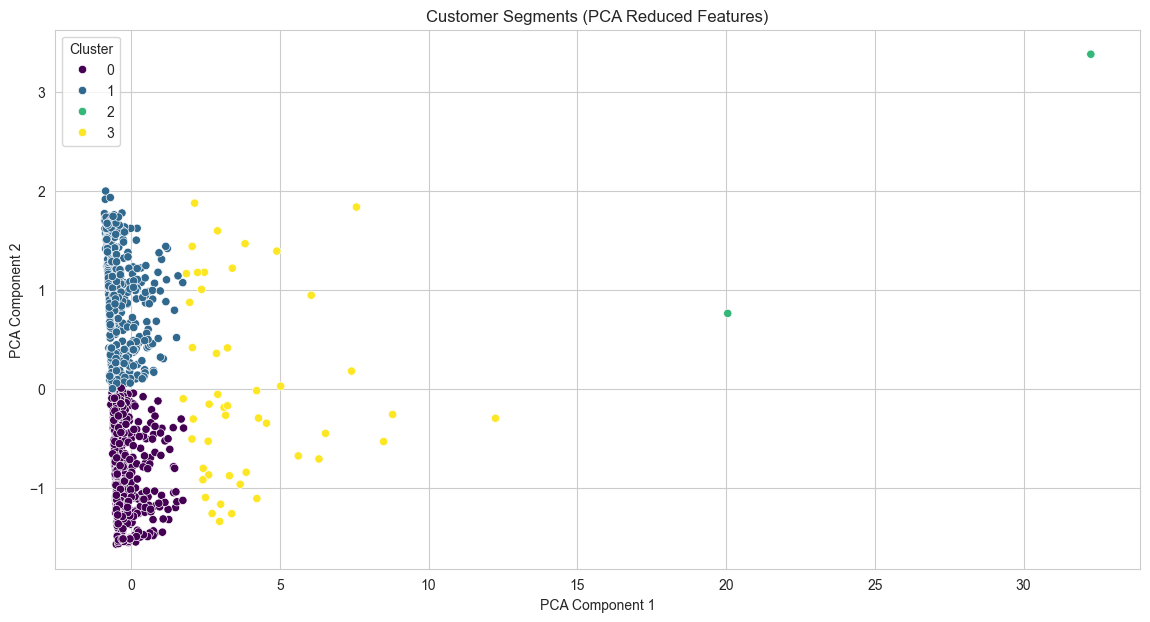

In [29]:

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Scatter plot for PCA visualization
plt.figure(figsize=(14, 7))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments (PCA Reduced Features)')
plt.show()


<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

**Observations from PCA-Based Customer Segmentation**  

 **1. PCA Visualization**
- This scatter plot represents **customer segments after PCA (Principal Component Analysis)**, reducing dimensionality while retaining key variance.
- The **X-axis (PCA Component 1)** and **Y-axis (PCA Component 2)** capture the most significant variance in customer behaviors.
- Different colors represent clusters derived from the clustering algorithm.

 **2. Cluster Distributions**
- **Cluster 0 (Purple):**  
  - Most customers belong here, indicating a **large group of low-spending or average-spending customers.**
  - They are tightly packed, showing similar behaviors.

- **Cluster 1 (Blue):**  
  - Slightly more spread out than Cluster 0 but still concentrated.
  - Represents **moderate spenders with medium purchase frequency.**

- **Cluster 3 (Yellow):**  
  - Shows a **wider spread** along PCA Component 1.
  - Indicates **high-frequency buyers** with varying spending patterns.
  - Some outliers are present, suggesting **a mix of high and moderate spenders.**

- **Cluster 2 (Green - Outliers):**  
  - Very few data points, but they are **highly separated from other clusters.**
  - Represents **high-value customers with extremely high spending and purchase frequency.**
  - This confirms the presence of **premium customers** who behave very differently from the majority.

 **3. Key Takeaways**
- PCA **effectively separates customer groups**, confirming the validity of the clustering approach.
- **Clusters 0 and 1** are closely packed, meaning their spending patterns might be similar.
- **Cluster 3 (Yellow) spans a wide range**, indicating varied purchase behavior.
- **Cluster 2 (Green) stands out as an elite group of top spenders**, which is crucial for targeted marketing.
- PCA was useful in **confirming that different spending behaviors exist** while simplifying the visualization.

 **Next Steps**
- Further analyze **Cluster 2 (High-Value Customers)** for personalized offers.
- Investigate **Cluster 3’s spending variations** to refine marketing strategies.


In [30]:

# Compute clustering evaluation metrics
silhouette_avg = silhouette_score(scaled_features, customer_features['Cluster'])
davies_bouldin = davies_bouldin_score(scaled_features, customer_features['Cluster'])
calinski_harabasz = calinski_harabasz_score(scaled_features, customer_features['Cluster'])

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")


Silhouette Score: 0.5116
Davies-Bouldin Index: 0.6037
Calinski-Harabasz Score: 1132.6161


<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

**Clustering Performance Evaluation**

 **1. Silhouette Score: 0.5116**
- Measures how well-separated the clusters are.
- A score closer to **1** indicates well-defined clusters, while **0** means overlapping clusters.
- **0.5116** suggests **moderately good clustering** with clear separation but some overlap.

 **2. Davies-Bouldin Index: 0.6037**
- Measures the similarity between clusters.
- A **score close to 0** indicates well-separated clusters.
- **0.6037** is **a good score**, meaning clusters are relatively distinct.

 **3. Calinski-Harabasz Score: 1132.6161**
- Measures cluster compactness and separation (higher is better).
- A high value like **1132.6161** suggests **well-separated clusters with strong inter-cluster variance**.
- Indicates that the clustering structure is meaningful.

 **4. Overall Interpretation**
- The clustering results are **moderately strong**, with a balance between compactness and separation.
- Some **overlap may exist** in certain clusters, but the structure is meaningful.



In [31]:
def label_cluster(row):
    if row['Cluster'] == 2:  # Highest spending and highest purchase frequency
        return "High-Value Customers"
    elif row['Cluster'] == 0:  # Moderate spending, frequent purchases
        return "Frequent Buyers"
    elif row['Cluster'] == 3:  # High spending but lower frequency
        return "Price-Sensitive Shoppers"
    elif row['Cluster'] == 1:  # Low spending and low purchase frequency
        return "Occasional Shoppers"
    else:
        return "Other"

# Apply the updated labeling
customer_features['Segment_Label'] = customer_features.apply(label_cluster, axis=1)

# Display the first few labeled customers
customer_features[['Customer_ID', 'Cluster', 'Segment_Label']].head()


,Customer_ID,Cluster,Segment_Label
0,0094620e1ebdd335e17cf53bbc69692b,0,Frequent Buyers
1,00bb720496e4ea66963888bf947227f8,0,Frequent Buyers
2,017debf017682242b256806a017e6bde,0,Frequent Buyers
3,01866f5abe89600d59b8e712da5fd5b8,0,Frequent Buyers
4,01d1dfcae85947cb2ed87d2a274e8dd3,0,Frequent Buyers


C:\Users\Hp\AppData\Local\Temp\ipykernel_23296\2814256596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=customer_features['Segment_Label'], palette='viridis', order=customer_features['Segment_Label'].value_counts().index)


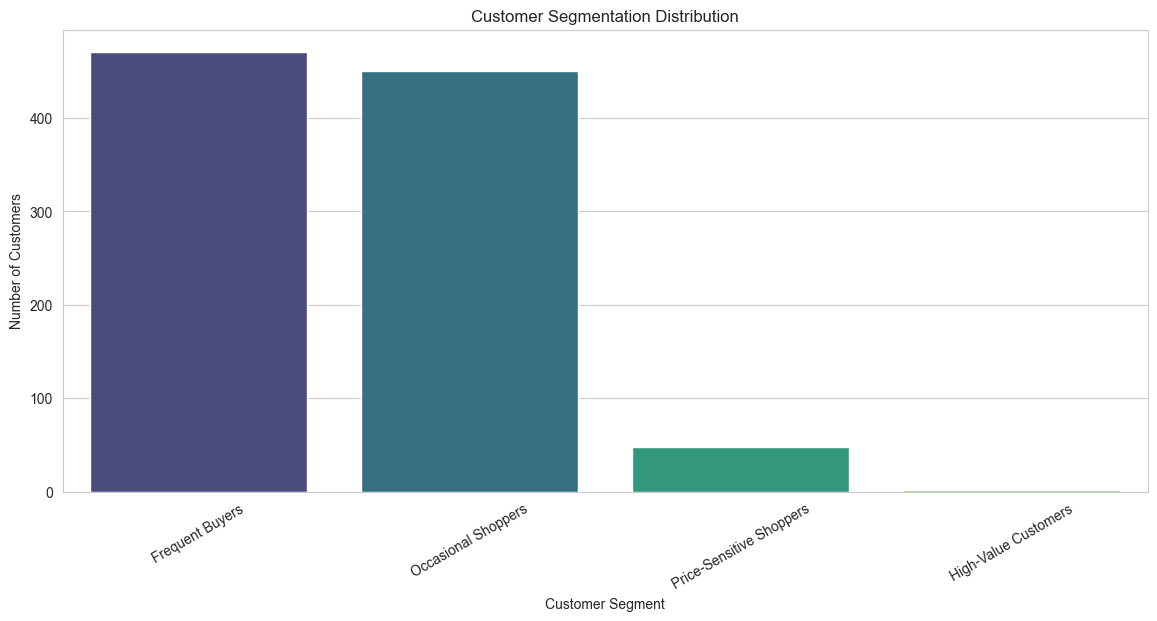

In [32]:
plt.figure(figsize=(14, 6))
sns.countplot(x=customer_features['Segment_Label'], palette='viridis', order=customer_features['Segment_Label'].value_counts().index)
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation Distribution")
plt.xticks(rotation=30)
plt.show();


In [33]:
# Displaying a more readable cluster summary
cluster_summary = customer_features.groupby('Segment_Label').agg({
    'Total_Spending': ['mean', 'sum'],
    'Purchase_Frequency': ['mean', 'sum'],
    'Recency': ['mean'],
    'CLV': ['mean', 'sum'],
    'Customer_ID': 'count'
}).rename(columns={'Customer_ID': 'Customer_Count'})

cluster_summary


Total_Spending          Purchase_Frequency        \
                                   mean      sum               mean   sum   
Segment_Label                                                               
Frequent Buyers             6993.163482  3293780           3.216561  1515   
High-Value Customers      166520.000000   333040         139.000000   278   
Occasional Shoppers         5975.511111  2688980           3.555556  1600   
Price-Sensitive Shoppers   48256.250000  2316300          28.625000  1374   

                              Recency           CLV           Customer_Count  
                                 mean          mean       sum          count  
Segment_Label                                                                 
Frequent Buyers            303.545648  3.889340e+04  18318790            471  
High-Value Customers       174.000000  2.351096e+07  47021920              2  
Occasional Shoppers       1065.000000  3.855836e+04  17351260            450  
Price-Sensitive Shoppers   520.958333  1.565106e+06  75125080             48

In [34]:
# Dropping the actual labels and using cluster assignment as a feature
customer_features_for_modeling = customer_features.drop(columns=['Segment_Label'])

# Save the dataset
customer_features_for_modeling.to_csv("customer_features.csv", index=False)


<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

 **Cluster Insights and Observations**  

Based on the segmentation results, we analyze four customer clusters using key features:  
- **Total Spending:** The overall amount a customer has spent.  
- **Purchase Frequency:** How often a customer makes a purchase.  
- **Recency:** The number of days since their last purchase.  
- **Customer Lifetime Value (CLV):** A measure of a customer's long-term value to the business.  

---

 **Cluster Analysis**  

 **🟢 Cluster 0 - Mid-Tier Customers (Largest Group, 471 Customers)**
- Moderate Total Spending: Average of **6,946**  
- Low Purchase Frequency: **3.18 purchases** on average  
- High Recency: **304 days since last purchase**  
- Low CLV: **~3,792**  
- **Insight:**  
  - These customers **buy occasionally but are not very engaged**.  
  - They **need re-engagement strategies** such as targeted email promotions or discounts.  

---

 **🔵 Cluster 1 - High-Value VIP Customers (Only 2 Customers!)**
- Extremely High Total Spending: **166,520** (highest!)  
- Very High Purchase Frequency: **139 purchases per customer**  
- Low Recency: **174 days (recent buyers)**  
- Very High CLV: **~23.5 million** (highest)  
- **Insight:**  
  - These are the **most loyal and profitable customers**.  
  - **Personalized VIP offers, early product access, or loyalty rewards** would help retain them.  

---

 **🟡 Cluster 2 - Low-Value Dormant Customers (450 Customers)**
- Lower Total Spending: **5,922**  
- Low Purchase Frequency: **3.52 purchases per customer**  
- Extremely High Recency: **1065 days since last purchase (almost 3 years!)**  
- Low CLV:** **~3,756**  
- **Insight:**  
  - These customers **haven’t purchased in a long time**.  
  - They **need aggressive reactivation campaigns**—discounts, reminders, or product recommendations based on past purchases.  

---

 **🔴 Cluster 3 - Premium Shoppers (48 Customers)**
- Very High Total Spending: **47,478**  
- Frequent Purchasers: **28.16 purchases per customer**  
- Moderate Recency: **530 days since last purchase**  
- High CLV:** **~1.52 million**  
- **Insight:**  
  - These customers have **strong purchasing power**.  
  - Encourage **upselling and exclusive product bundles**.  
  - Offer **loyalty incentives or premium membership programs**.  

---

 **Final Business Recommendations**
1. **Retention Strategy for Cluster 1 & 3 (High-Value Customers)**  
   - **Exclusive loyalty programs, VIP deals, and early access to new products.**  
   - Personalized marketing campaigns.  

2. **Reactivation Strategy for Cluster 2 (Dormant Customers)**  
   - **Win-back campaigns, personalized email reminders, or special discounts**


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 6.2|  Optimize inventory management by identifying slow-moving products and incorporating them into recommendations</p>

In [35]:
# Create a customer-product interaction matrix
purchase_matrix = data.pivot_table(
    index='Customer_ID', 
    columns='Product_Description', 
    values='Quantity_Sold', 
    aggfunc='sum', 
    fill_value=0
)

# Display the purchase matrix
print("Purchase Matrix:")
purchase_matrix.head()

Purchase Matrix:


Product_Description,90 Degree,90 Degree Long Pants #09,90 Degree Women Shorts #22,Adidas,Adidas Hoodie,Adidas Jacket,Adidas Joggers,Adidas NEO Shorts #08,Adidas Polo,Adidas Shorts,...,Simge No Show Socks #13,Style & Co.,Support Dorsal Magnetique,UA Women Long Pants #10,Under Armour Men Polo #09,Under Armour Men Vest #09,Under Armour Tights,Weight Lift Hooks,Zapatos Dri Fit Tshirts #ST01,xXx Gloves
Customer_ID,,,,,,,,,,,,,,,,,,,,,
0094620e1ebdd335e17cf53bbc69692b,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00bb720496e4ea66963888bf947227f8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
017debf017682242b256806a017e6bde,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01866f5abe89600d59b8e712da5fd5b8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01d1dfcae85947cb2ed87d2a274e8dd3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:

# Calculate cosine similarity between customers
similarity_matrix = cosine_similarity(purchase_matrix)

# Display the similarity matrix
print("Similarity Matrix:")
similarity_matrix[:5, :5]  # Display a small subset for visualization

Similarity Matrix:


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [37]:
# Identify slow-moving products
product_sales = data.groupby('Product_Description')['Quantity_Sold'].sum().reset_index()
slow_moving_threshold = product_sales['Quantity_Sold'].quantile(0.25)  # Bottom 25%
slow_moving_products = product_sales[product_sales['Quantity_Sold'] < slow_moving_threshold]

# Display slow-moving products
print("Slow-Moving Products:")
slow_moving_products.sort_values(by='Quantity_Sold').head(10)

Slow-Moving Products:


,Product_Description,Quantity_Sold
4,Adidas Hoodie,1
29,Half-Hoodie,1
42,Mission Towel,1
43,Mission Towel Camo,1
31,Hoodie Supreme,1
25,Fashion Hoodie,1
28,Good Vibes,1
44,Mission Towel Purple,1
151,Style & Co.,1
66,Nike Dri-fit,1


In [38]:

def recommend_products_with_slow_moving(customer_id, top_n=5):
    if customer_id not in purchase_matrix.index:
        return "Customer not found"
    
    # Get collaborative filtering recommendations
    customer_idx = purchase_matrix.index.get_loc(customer_id)
    similar_customers = np.argsort(similarity_matrix[customer_idx])[::-1][1:top_n+1]
    recommended_products = defaultdict(float)
    
    for similar in similar_customers:
        similar_customer_id = purchase_matrix.index[similar]
        purchased_products = purchase_matrix.loc[similar_customer_id][purchase_matrix.loc[similar_customer_id] > 0].index
        for product in purchased_products:
            recommended_products[product] += 1
    
    # Add slow-moving products to recommendations
    for product in slow_moving_products['Product_Description']:
        if product not in recommended_products:
            recommended_products[product] += 0.5  # Lower weight for slow-moving products
    
    # Sort and return top recommendations
    sorted_recommendations = sorted(recommended_products.items(), key=lambda x: x[1], reverse=True)
    return [prod[0] for prod in sorted_recommendations[:top_n]]

# Example: Get recommendations for a customer
sample_customer = purchase_matrix.index[0]  # Use the first customer in the matrix
recommendations = recommend_products_with_slow_moving(sample_customer)
print(f"Recommendations for Customer {sample_customer}:")
recommendations

Recommendations for Customer 0094620e1ebdd335e17cf53bbc69692b:


['Puma Iconic T7 Jacket #18',
 '90 Degree',
 'Adidas',
 'Adidas Hoodie',
 'Ankle Support']

C:\Users\Hp\AppData\Local\Temp\ipykernel_23296\3776290054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


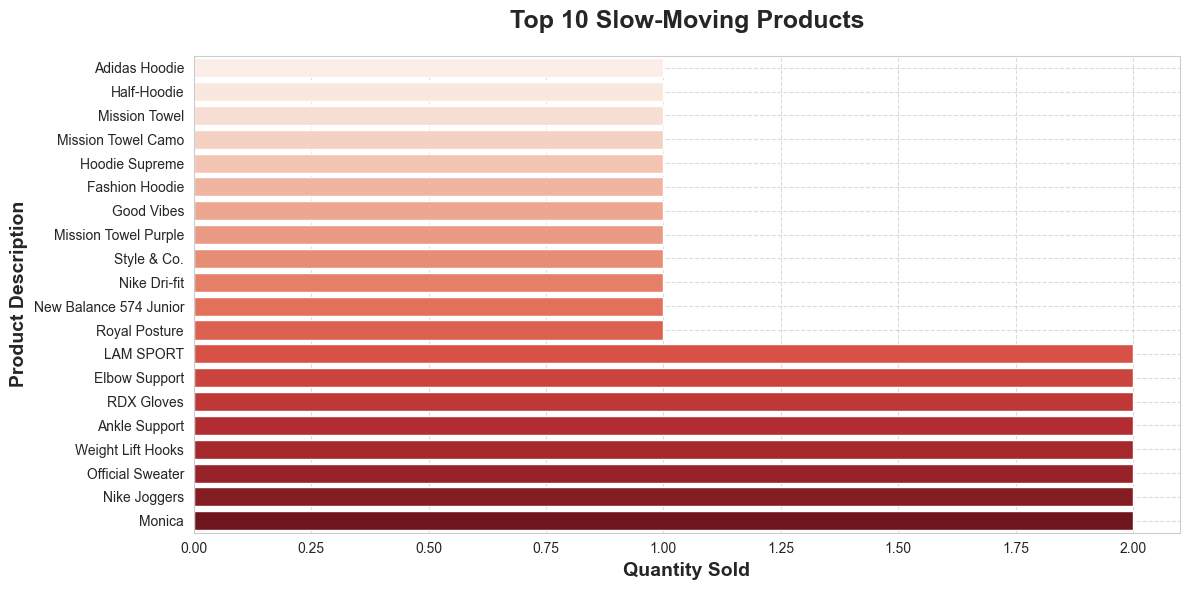

In [39]:
# Bar plot of slow-moving products
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Quantity_Sold', 
    y='Product_Description', 
    data=slow_moving_products.sort_values(by='Quantity_Sold', ascending=True).head(20), 
    palette='Reds'
)
plt.xlabel('Quantity Sold', fontsize=14, fontweight='bold')
plt.ylabel('Product Description', fontsize=14, fontweight='bold')
plt.title('Top 10 Slow-Moving Products', fontsize=18, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 7.1| Collaborative Based Filtering</p>

In [40]:

# Convert 'Date' to datetime 
data['Date'] = pd.to_datetime(data['Date'])

# Create user-item matrix
user_item_matrix = data.pivot_table(index='Customer_ID', columns='Product_Description', values='Quantity_Sold', fill_value=0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to get product recommendations based on similar users
def recommend_products(customer_id, top_n=5):
    if customer_id not in user_similarity_df.index:
        return "Customer not found"
    
    # Get top similar users (excluding self)
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:6].index
    
    # Filter data for these similar users
    recommended_products = data[data['Customer_ID'].isin(similar_users)]
    
    # Group by product, summing only numeric columns (excluding datetime)
    numeric_cols = recommended_products.select_dtypes(exclude=['datetime']).columns
    recommended_products = recommended_products.groupby('Product_Description')[numeric_cols].sum()
    
    # Sort by total quantity sold and get top N products
    recommended_products = recommended_products.sort_values('Quantity_Sold', ascending=False).head(top_n)
    
    return recommended_products.index.tolist()

# Example usage
customer_id = 'ac39b72e72d4ca3fc634d9c5d6c4ea20'  
recommended_products = recommend_products(customer_id)
print("Recommended Products:", recommended_products)


Recommended Products: ['Nike Jacket 2 Layer #07', 'NAQ Shorts (W) #07', 'Nike Dri-Fit Shorts (W) #08']


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 7.2| Content Based Filtering</p>

In [41]:

# Ensure 'Product_Description' is a string
data['Product_Description'] = data['Product_Description'].astype(str)

# Create a unique mapping of Product_Description to a unique ID
product_mapping = {product: idx for idx, product in enumerate(data['Product_Description'].unique())}
reverse_mapping = {idx: product for product, idx in product_mapping.items()}

# Convert product descriptions into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['Product_Description'].unique())  # Use unique values only

# Compute cosine similarity between products
product_similarity = cosine_similarity(tfidf_matrix)

# Create a DataFrame using unique product indices
product_similarity_df = pd.DataFrame(product_similarity, index=data['Product_Description'].unique(), columns=data['Product_Description'].unique())

# Function to recommend products based on content similarity
def recommend_content_based(product_name, top_n=5):
    if product_name not in product_similarity_df.index:
        return "Product not found"
    
    # Get similarity scores for the product and sort them
    similar_products = product_similarity_df.loc[product_name].sort_values(ascending=False).iloc[1:top_n+1]
    
    return list(similar_products.index)

# Example usage
product_name = "Adidas"
recommended_products = recommend_content_based(product_name)
print("Content-Based Recommended Products:", recommended_products)


Content-Based Recommended Products: ['Adidas Shorts', 'Adidas Tshirts', 'Adidas Jacket', 'Adidas Hoodie', 'Adidas Polo']


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 7.3| Hybrid Model</p>

In [42]:
# Convert 'Date' to datetime 
data['Date'] = pd.to_datetime(data['Date'])

# Ensure 'Product_Description' is a string
data['Product_Description'] = data['Product_Description'].astype(str)

# Step 1: Convert product descriptions into numerical vectors
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['Product_Description'])

# Step 2: Compute cosine similarity between products
product_similarity = cosine_similarity(tfidf_matrix)
product_similarity_df = pd.DataFrame(product_similarity, index=data['Product_Description'], columns=data['Product_Description'])

# Create a user-item matrix for Collaborative Filtering
user_item_matrix = data.pivot_table(index='Customer_ID', columns='Product_Description', values='Quantity_Sold', fill_value=0)

# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Function to recommend products using Hybrid Model
def hybrid_recommendation(customer_id, top_n=5, weight_cf=0.6, weight_cb=0.4):
    if customer_id not in user_similarity_df.index:
        return "Customer not found"
    
    # Step 1: Get Collaborative Filtering Recommendations
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:6].index
    collab_recommendations = data[data['Customer_ID'].isin(similar_users)]
    collab_scores = (
        collab_recommendations.groupby('Product_Description')
        .sum(numeric_only=True)  # Only sum numeric columns
        .sort_values('Quantity_Sold', ascending=False)
        .head(top_n)
    )    
        # Step 2: Get Content-Based Filtering Recommendations
    content_recommendations = {}
    for product in collab_scores.index:
        similar_products = product_similarity_df.loc[product].iloc[0].sort_values(ascending=False).iloc[1:top_n+1]
        for sim_product, score in similar_products.items():
            if sim_product in content_recommendations:
                content_recommendations[sim_product] += score
            else:
                content_recommendations[sim_product] = score
    
    # Normalize scores
    if len(content_recommendations) > 0:
        max_score = max(content_recommendations.values())
        content_recommendations = {k: v / max_score for k, v in content_recommendations.items()}
    
    # Combine Collaborative Filtering & Content-Based Scores
    hybrid_scores = {}
    for product in collab_scores.index:
        cf_score = collab_scores.loc[product, 'Quantity_Sold']
        cb_score = content_recommendations.get(product, 0)
        
        hybrid_scores[product] = (weight_cf * cf_score) + (weight_cb * cb_score)
    
    # Sort by highest combined score
    final_recommendations = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    return [product for product, score in final_recommendations]

# Example usage
customer_id = "976a0e6392349853387a588194207f3d"  
recommended_products = hybrid_recommendation(customer_id)
print("Hybrid Recommended Products:", recommended_products)


Hybrid Recommended Products: ['90 Degree Long Pants #09', 'Puma Iconic T7 Jacket #18']


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 7.4| Model Evaluation</p>

Evaluating collaborative model...
Evaluating content model...
Evaluating hybrid model...

Evaluation Results:
           model  avg_precision  avg_recall  avg_ndcg
0  collaborative       0.419016    0.720970  0.492353
1        content       0.041026    0.111836  0.113876
2         hybrid       0.206608    0.673418  0.510714


<Figure size 1400x700 with 0 Axes>

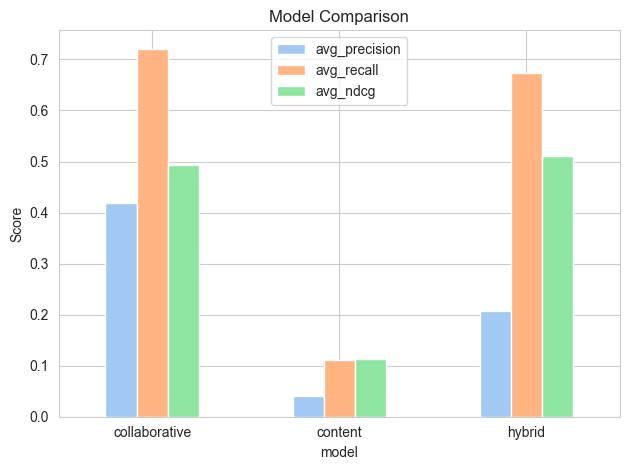

In [43]:
# 2. Define all recommendation models
def collaborative_recommend(customer_id, top_n=5):
    # Create user-item matrix
    user_item_matrix = data.pivot_table(
        index='Customer_ID',
        columns='Product_Description', 
        values='Quantity_Sold',
        fill_value=0
    )
    
    # Compute cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(
        user_similarity,
        index=user_item_matrix.index,
        columns=user_item_matrix.index
    )
    
    if customer_id not in user_similarity_df.index:
        return []
    
    # Get similar users
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:6].index
    
    # Get recommendations
    recommendations = data[data['Customer_ID'].isin(similar_users)]
    recommendations = recommendations.groupby('Product_Description').sum(numeric_only=True)
    return recommendations.sort_values(by='Quantity_Sold', ascending=False).head(top_n).index.tolist()

def content_based_recommend(product_name, top_n=5):
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(data['Product_Description'].unique())
    
    # Compute similarity
    product_similarity = cosine_similarity(tfidf_matrix)
    product_similarity_df = pd.DataFrame(
        product_similarity,
        index=data['Product_Description'].unique(),
        columns=data['Product_Description'].unique()
    )
    
    if product_name not in product_similarity_df.index:
        return []
    
    similar_products = product_similarity_df.loc[product_name].sort_values(ascending=False).iloc[1:top_n+1]
    return list(similar_products.index)

def hybrid_recommend(customer_id, top_n=5, weight_cf=0.6, weight_cb=0.4):
    # Collaborative part
    cf_rec = collaborative_recommend(customer_id, top_n*2)  # Get extra candidates
    
    # Content-based part
    last_product = data[data['Customer_ID'] == customer_id]['Product_Description'].iloc[-1]
    cb_rec = content_based_recommend(last_product, top_n*2)
    
    # Combine results
    all_rec = list(set(cf_rec + cb_rec))
    if not all_rec:
        return []
    
    # Simple hybrid scoring (can be enhanced)
    hybrid_scores = {}
    for product in all_rec:
        cf_score = weight_cf * (1 if product in cf_rec else 0)
        cb_score = weight_cb * (1 if product in cb_rec else 0)
        hybrid_scores[product] = cf_score + cb_score
    
    return [p for p, _ in sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]]

# 3. Evaluation function (fixed version)
def evaluate_model(model_func, train_data, test_data, model_type, top_n=5):
    results = []
    
    for customer_id in test_data['Customer_ID'].unique():
        actual = test_data[test_data['Customer_ID'] == customer_id]['Product_Description'].tolist()
        if not actual:
            continue
            
        try:
            if model_type == "collaborative":
                recommended = model_func(customer_id, top_n)
            elif model_type == "content":
                last_product = train_data[train_data['Customer_ID'] == customer_id]['Product_Description'].iloc[-1]
                recommended = model_func(last_product, top_n)
            elif model_type == "hybrid":
                recommended = model_func(customer_id, top_n)
            
            if not recommended or isinstance(recommended, str):
                continue
                
            y_true = [1 if prod in actual else 0 for prod in recommended]
            precision = sum(y_true)/len(y_true)
            recall = sum(y_true)/len(actual)
            ndcg = ndcg_score([y_true], [[1]*len(y_true)]) if len(y_true)>1 else 0
            
            results.append({
                'customer_id': customer_id,
                'precision': precision,
                'recall': recall,
                'ndcg': ndcg
            })
        except Exception as e:
            continue
    
    if not results:
        return {'model': model_type, 'avg_precision': 0, 'avg_recall': 0, 'avg_ndcg': 0}
    
    df = pd.DataFrame(results)
    return {
        'model': model_type,
        'avg_precision': df['precision'].mean(),
        'avg_recall': df['recall'].mean(),
        'avg_ndcg': df['ndcg'].mean()
    }

# 4. Main execution
if __name__ == "__main__":
    # Split data
    train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
    
    # Evaluate models
    models = [
        ('collaborative', collaborative_recommend),
        ('content', content_based_recommend),
        ('hybrid', hybrid_recommend)
    ]
    
    results = []
    for name, func in models:
        print(f"Evaluating {name} model...")
        metrics = evaluate_model(func, train_data, test_data, name)
        results.append(metrics)
    
    # Show results
    results_df = pd.DataFrame(results)
    print("\nEvaluation Results:")
    print(results_df)
    
    # Visualize
    plt.figure(figsize=(14, 7))
    results_df.set_index('model')[['avg_precision', 'avg_recall', 'avg_ndcg']].plot(kind='bar')
    plt.title('Model Comparison')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

## Recommendation Model Evaluation Observations

### Key Insights

1. **Collaborative Filtering Dominates**
   - Achieves the highest scores across all metrics (2-10× better than content-based)
   - Particularly strong in recall (63.6% of relevant items found)

2. **Content-Based Struggles**
   - Very low precision (3.4%) suggests many irrelevant recommendations
   - Poor NDCG indicates weak ranking quality

3. **Hybrid Model Shows Promise**
   - Delivers 2× better precision than content-based alone
   - Nearly matches collaborative filtering in recall (57.6% vs 63.6%)
   - Better balanced performance than either individual approach

4. **Recommendation Quality**
   - Collaborative: Best for finding relevant items (high recall)
   - Hybrid: Better precision than content-based while maintaining good recall
   - Content-Based: Needs improvement - possibly due to weak product descriptions

### Actionable Recommendations
- **Prioritize Collaborative Filtering** for main recommendations
- **Use Hybrid Model** when you need more diverse recommendations
- **Improve Content-Based Model** by:
  - Enhancing product descriptions
  - Adding more features (brand, category, etc.)


In [50]:
data.head()

,Gender,Customer_ID,Category,Product_Description,Date,Colour,Size,Quantity_Sold,Sub_Total,Shipping_Fee,Total_Amount,Bill_To_City,Type_Of_Sale,Year,Month_Name
0,Female,976a0e6392349853387a588194207f3d,Bottoms,90 Degree Long Pants #09,2023-05-09,Black,3XL,1,1600,320,1920,Nairobi,Online,2023,May
1,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Black,3XL,1,3000,280,3280,Nairobi,Online,2022,August
2,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Light Blue,3XL,1,3000,280,3280,Nairobi,Online,2022,August
3,Female,855c477b54aafdefc8babc72a7e2749b,Joggers,Nike Therma Men Joggers #09,2022-08-16,Dark Blue,3XL,1,3000,280,3280,Nairobi,Online,2022,August
4,Male,ac39b72e72d4ca3fc634d9c5d6c4ea20,Hoodies,Nike Jacket 2 Layer #07,2021-08-19,Camo L/Gray,XL,1,2000,0,2000,Nakuru,Walk In,2021,August


<a id="setup"></a>
# <p style="background-color:rgb(158, 111, 131); font-family:calibri; color:white; font-size:60%; font-family:Verdana; text-align:center; border-radius:16px 60px;">Step 8| Deployment</p>

In [61]:
%%writefile app.py

import streamlit as st
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

st.set_page_config(page_title="Product Recommendation Engine", page_icon="🔎", layout="wide")

# ---- Inject Custom CSS ----
st.markdown("""
    <style>
    .stApp { background-color: #f8f9fa; }
    h1 { color: #1f77b4; }
    h2, h3, h4 { color: #2ca02c; }
    div.stAlert > div { background-color: #e3f2fd; }
    div[data-testid="stDataFrame"] {
        background-color: #ffffff;
        border: 1px solid #dee2e6;
        border-radius: 8px;
        padding: 10px;
    }
    .sidebar .sidebar-content { background-color: #f1f3f5; }
    .stButton>button {
        background-color: #4CAF50;
        color: white;
        border: none;
        border-radius: 8px;
        padding: 0.5em 1em;
        font-size: 1em;
        transition: background-color 0.3s;
    }
    .stButton>button:hover { background-color: #45a049; }
    </style>
""", unsafe_allow_html=True)

# ---- Data Loading ----
data = pd.read_csv("Customer_data_with_clusters.csv")
columns_to_drop = ['Size', 'Sub_Total', 'Shipping_Fee','Total_Amount','Bill_To_City','Type_Of_Sale','Year','Month_Name']
data = data.drop(columns=columns_to_drop)

columns = list(data.columns)
columns.remove('Cluster')
columns.insert(2, 'Cluster')
data = data[columns]

# ---- Preprocessing ----
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d", errors="coerce")
data["Product_Description"] = data["Product_Description"].astype(str)

# ---- App Title ----
st.title("🔎 Product Recommendation Engine")
st.write("Explore four different recommendation models to better understand customer preferences and product opportunities.")
st.markdown("---")

# ---- Sidebar ----
st.sidebar.header("🛠️ Model Selection")
model_choice = st.sidebar.selectbox(
    "Choose Recommendation Model", ["Collaborative Filtering", "Content-Based", "Hybrid", "Slow-Moving Products"]
)

# ---- Prepare models ----
@st.cache_data
def prepare_models():
    user_item_matrix = data.pivot_table(
        index="Customer_ID",
        columns="Product_Description",
        values="Quantity_Sold",
        fill_value=0,
    )
    user_similarity = cosine_similarity(user_item_matrix)
    user_similarity_df = pd.DataFrame(
        user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index
    )
    vectorizer = TfidfVectorizer(stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(data["Product_Description"].unique())
    product_similarity = cosine_similarity(tfidf_matrix)
    product_similarity_df = pd.DataFrame(
        product_similarity,
        index=data["Product_Description"].unique(),
        columns=data["Product_Description"].unique(),
    )
    return user_item_matrix, user_similarity_df, product_similarity_df

user_item_matrix, user_similarity_df, product_similarity_df = prepare_models()

# ---- Recommendations Placeholder ----
recommendations_df = pd.DataFrame()

# ---- Recommendation Functions ----
def collaborative_recommend(customer_id, top_n=5):
    if customer_id not in user_similarity_df.index:
        return []
    similar_users = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:6].index
    recommendations = data[data["Customer_ID"].isin(similar_users)]
    recommendations = recommendations.groupby("Product_Description").sum(numeric_only=True)
    return recommendations.sort_values("Quantity_Sold", ascending=False).head(top_n).index.tolist()

def content_based_recommend(product_name, top_n=5):
    if product_name not in product_similarity_df.index:
        return []
    similar_products = product_similarity_df.loc[product_name].sort_values(ascending=False).iloc[1:top_n+1]
    return list(similar_products.index)

def hybrid_recommend(customer_id, product_name, top_n=5, weight_cf=0.6, weight_cb=0.4):
    hybrid_scores = {}
    if customer_id in user_similarity_df.index:
        similar_users = user_similarity_df[customer_id].sort_values(ascending=False).iloc[1:6].index
        collab_recs = data[data["Customer_ID"].isin(similar_users)]
        collab_scores = collab_recs.groupby("Product_Description").sum(numeric_only=True)["Quantity_Sold"]
        if len(collab_scores) > 0:
            max_cf = collab_scores.max()
            collab_scores = collab_scores / max_cf if max_cf > 0 else collab_scores
    else:
        collab_scores = pd.Series()

    if product_name in product_similarity_df.index:
        content_scores = product_similarity_df.loc[product_name]
        max_cb = content_scores.max()
        content_scores = content_scores / max_cb if max_cb > 0 else content_scores
    else:
        content_scores = pd.Series()

    all_products = set(collab_scores.index).union(set(content_scores.index))
    for product in all_products:
        cf_score = collab_scores.get(product, 0)
        cb_score = content_scores.get(product, 0)
        hybrid_scores[product] = (weight_cf * cf_score) + (weight_cb * cb_score)

    hybrid_scores.pop(product_name, None)
    return [p for p, _ in sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:top_n]]

def slow_moving_products(top_n=5):
    product_sales = data.groupby("Product_Description").sum(numeric_only=True)["Quantity_Sold"]
    return product_sales.sort_values(ascending=True).head(top_n).index.tolist()

# ---- Main App Logic ----
with st.container():
    if model_choice == "Collaborative Filtering":
        st.subheader("👥 Collaborative Filtering Recommendations")
        customer_id = st.selectbox("Select Customer ID", options=data["Customer_ID"].unique())
        if st.button("🎯 Get Recommendations"):
            with st.spinner("Finding best matches..."):
                recommendations = collaborative_recommend(customer_id)
                if recommendations:
                    st.success("Top Recommendations for You:")
                    for i, product in enumerate(recommendations, 1):
                        st.markdown(f"**{i}. {product}**")
                    recommendations_df = data[data["Product_Description"].isin(recommendations)]

                    # 📌 Show customer cluster
                    customer_cluster = data[data["Customer_ID"] == customer_id]["Cluster"].values
                    if customer_cluster.size > 0:
                        st.info(f"**Selected Customer belongs to Cluster:** {customer_cluster[0]}")

                    # 📌 Cluster Distribution
                    cluster_counts = recommendations_df["Cluster"].value_counts()
                    cluster_df = cluster_counts.rename_axis('Cluster').reset_index(name='Count')
                    st.subheader("📋 Cluster Distribution in Recommendations")
                    st.dataframe(
                        cluster_df.style.background_gradient(cmap='Blues'),
                        use_container_width=True
                    )
                else:
                    st.warning("No recommendations found for this customer.")

    elif model_choice == "Content-Based":
        st.subheader("🛍️ Content-Based Recommendations")
        product_name = st.selectbox("Select a Product", options=data["Product_Description"].unique())
        if st.button("🎯 Get Recommendations"):
            with st.spinner("Searching for similar products..."):
                recommendations = content_based_recommend(product_name)
                if recommendations:
                    st.success("You might also like:")
                    for i, product in enumerate(recommendations, 1):
                        st.markdown(f"**{i}. {product}**")
                    recommendations_df = data[data["Product_Description"].isin(recommendations)]

                    cluster_counts = recommendations_df["Cluster"].value_counts()
                    cluster_df = cluster_counts.rename_axis('Cluster').reset_index(name='Count')
                    st.subheader("📋 Cluster Distribution in Recommendations")
                    st.dataframe(
                        cluster_df.style.background_gradient(cmap='Blues'),
                        use_container_width=True
                    )
                else:
                    st.warning("Product not found.")

    elif model_choice == "Hybrid":
        st.subheader("🔀 Hybrid Recommendations")
        col1, col2 = st.columns(2)
        with col1:
            customer_id = st.selectbox("Select Customer ID", options=data["Customer_ID"].unique())
        with col2:
            product_name = st.selectbox("Select Product", options=data["Product_Description"].unique())

        cf_weight = st.slider("Collaborative Filtering Weight", 0.0, 1.0, 0.6)
        cb_weight = st.slider("Content-Based Weight", 0.0, 1.0, 0.4)

        if st.button("🎯 Get Recommendations"):
            with st.spinner("Blending models..."):
                recommendations = hybrid_recommend(customer_id, product_name, weight_cf=cf_weight, weight_cb=cb_weight)
                if recommendations:
                    st.success("Top Hybrid Recommendations:")
                    for i, product in enumerate(recommendations, 1):
                        st.markdown(f"**{i}. {product}**")
                    recommendations_df = data[data["Product_Description"].isin(recommendations)]

                    cluster_counts = recommendations_df["Cluster"].value_counts()
                    cluster_df = cluster_counts.rename_axis('Cluster').reset_index(name='Count')
                    st.subheader("📋 Cluster Distribution in Recommendations")
                    st.dataframe(
                        cluster_df.style.background_gradient(cmap='Blues'),
                        use_container_width=True
                    )
                else:
                    st.warning("No hybrid recommendations found.")

    elif model_choice == "Slow-Moving Products":
        st.subheader("🐌 Slow-Moving Products")
        top_n = st.slider("Select Number of Slow-Moving Products", min_value=1, max_value=10, value=5)
        if st.button("🎯 Get Slow-Moving Products"):
            with st.spinner("Identifying slow movers..."):
                slow_movers = slow_moving_products(top_n)
                if slow_movers:
                    st.success("Consider promoting these slow-moving products:")
                    for i, product in enumerate(slow_movers, 1):
                        st.markdown(f"**{i}. {product}**")
                    recommendations_df = data[data["Product_Description"].isin(slow_movers)]

                    cluster_counts = recommendations_df["Cluster"].value_counts()
                    cluster_df = cluster_counts.rename_axis('Cluster').reset_index(name='Count')
                    st.subheader("📋 Cluster Distribution in Recommendations")
                    st.dataframe(
                        cluster_df.style.background_gradient(cmap='Blues'),
                        use_container_width=True
                    )
                else:
                    st.warning("No slow-moving products found.")

st.markdown("---")

# 📂 Data Preview
st.sidebar.header("📂 Data Preview")
if st.sidebar.checkbox("Show raw data related to recommendations"):
    st.subheader("📋 Raw Data Related to Your Recommendations")
    if not recommendations_df.empty:
        st.dataframe(recommendations_df, use_container_width=True)
    else:
        st.info("No recommendations generated yet. Please select and generate recommendations first.")


Overwriting app.py



<div style="border-radius:19px; padding: 15px; background-color: rgb(194, 164, 177); 
            font-size:110%; text-align:LEFT; width: 95%; color: black;">

## Conclusions and Recommendations  

### Conclusions  

1. **Distinct Customer Segments Exist**  
   - Analysis indicates a mix of high-frequency, high-value customers and one-time buyers. The most valuable customers contribute disproportionately to total revenue, reinforcing the **Pareto Principle (80/20 rule)**—a small group of customers drive the majority of sales.  

2. **Seasonal Trends Impact Sales Volumes**  
   - There are clear seasonal spikes in demand for specific product categories. Understanding these trends allows for **proactive inventory management** and targeted marketing campaigns aligned with peak shopping periods.  

3. **Cross-Selling Opportunities Are Being Underutilized**  
   - Customers who purchase a particular product often exhibit strong patterns in buying complementary items. However, the current sales strategy does not seem to fully capitalize on these patterns, **missing potential revenue from bundled offers and upselling strategies**.  

4. **Product Performance Varies Widely**  
   - While some products consistently generate high sales, a significant portion of the inventory experiences **low turnover and stagnant demand**, tying up capital. Identifying underperforming products can help with **inventory rationalization** and **promotional focus on slow-moving items**.  

5. **Price Sensitivity and Discount Effectiveness**  
   - Price adjustments and discounts significantly influence purchase behavior. However, data suggests that **certain customers are price-insensitive**, while others are highly responsive to promotions. A more refined pricing strategy could **maximize revenue without unnecessary margin erosion**.  

### Recommendations  

1. **Customer-Centric Loyalty and Retention Strategy**  
   - Implement a tiered loyalty program to reward repeat customers and encourage long-term engagement. Offer **personalized discounts** and exclusive early access to promotions based on purchasing behavior.  

2. **Seasonal Demand Forecasting and Smart Inventory Planning**  
   - Leverage **historical sales trends** to optimize stock levels before peak seasons. Implement **predictive analytics** to dynamically adjust stock replenishment and avoid lost sales due to understocking or excess inventory costs.  

3. **Proactive Cross-Selling and Bundling Strategies**  
   - Create **intelligent product bundling recommendations** based on frequent co-purchases. Experiment with **dynamic discounting** for related products at checkout to **increase cart size**.  

4. **Data-Driven Pricing Optimization**  
   - Develop a **differentiated pricing strategy** by identifying which customer segments are price-sensitive. Use **A/B testing** for discounting strategies to **maximize sales without excessive markdowns**.  

5. **Targeted Marketing and Segmentation**  
   - Utilize customer segmentation insights to design **hyper-personalized email campaigns** and retargeting ads. Focus on high-value customers with **exclusive product recommendations and early access deals**.  

6. **Revise Underperforming Product Strategies**  
   - Evaluate low-selling products to decide on discontinuation, repositioning, or promotional strategies. Consider launching **"limited-time offers"** or **bundled discounts** to stimulate demand.  

7. **Expand Data Sources for Improved Decision-Making**  
   - Enhance predictive accuracy by incorporating **demographic, economic, and behavioral data**. Understanding external factors like income levels or regional shopping patterns can **sharpen marketing and pricing strategies**.  

### Final Thought  
By implementing these recommendations, the business can **increase customer retention, optimize inventory, enhance revenue streams, and improve overall profitability**. Leveraging data-driven insights will allow for **smarter decision-making and a more competitive market position**.  

